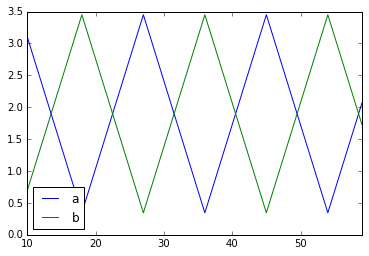

In [8]:
import pandas as pd
from random import random

flow = (list(range(1,10,1)) + list(range(10,1,-1)))*100
pdata = pd.DataFrame({"a":flow, "b":flow})
pdata.b = pdata.b.shift(9)
data = pdata.iloc[10:] * random()  # some noise
data[0:50].plot()

In [9]:
%matplotlib inline

In [10]:
import numpy as np

def _load_data(data, n_prev = 100):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

in_out_neurons = 2
hidden_neurons = 50

model = Sequential()
model.add(LSTM(hidden_neurons, input_dim=in_out_neurons, return_sequences=False))
model.add(Dense(in_out_neurons, input_dim=hidden_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [12]:
(X_train, y_train), (X_test, y_test) = train_test_split(data)  # retrieve data
model.fit(X_train, y_train, batch_size=700, nb_epoch=10, validation_split=0.05)

predicted = model.predict(X_test)
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))

# and maybe plot it

Train on 1435 samples, validate on 76 samples
Epoch 1/10
1435/1435 [==============================] - 0s - loss: 4.4070 - val_loss: 2.8699
Epoch 2/10
1435/1435 [==============================] - 0s - loss: 2.6533 - val_loss: 1.8518
Epoch 3/10
1435/1435 [==============================] - 0s - loss: 1.7001 - val_loss: 1.1652
Epoch 4/10
1435/1435 [==============================] - 0s - loss: 1.0616 - val_loss: 0.7570
Epoch 5/10
1435/1435 [==============================] - 0s - loss: 0.6922 - val_loss: 0.5776
Epoch 6/10
1435/1435 [==============================] - 0s - loss: 0.5398 - val_loss: 0.4725
Epoch 7/10
1435/1435 [==============================] - 0s - loss: 0.4451 - val_loss: 0.4774
Epoch 8/10
1435/1435 [==============================] - 0s - loss: 0.4301 - val_loss: 0.3734
Epoch 9/10
1435/1435 [==============================] - 0s - loss: 0.3579 - val_loss: 0.3632
Epoch 10/10
1435/1435 [==============================] - 0s - loss: 0.3253 - val_loss: 0.2835


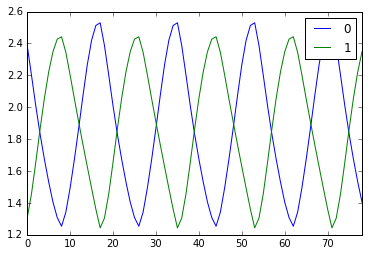

In [14]:
pd.DataFrame(predicted).plot()

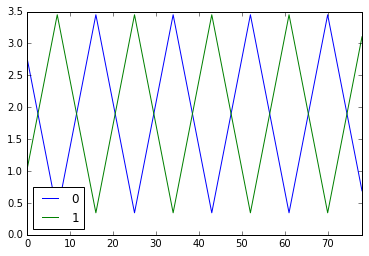

In [16]:
pd.DataFrame(y_test).plot()